<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/modelo_inhibicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Modelo 6 (Inhibición por sustrato)

Autor: Juan Manuel Guiérrez García

Afiliación: Instituto Tecnológico de Morelia 

Fecha: Enero 2021

In [1]:
# cargar librerias 
install.packages("deSolve")
library(deSolve)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [44]:
# monod equation 
monod <- function(s) {

  mu = mu_max*s/(ks + s)

  return(mu)
}

In [45]:
# substrate inhibition equation 
subinhib <- function(s) {

  mu = mu_max*s/(ks + s + ki*s^2)

  return(mu)
}

In [46]:
# establish parameter values

# monod
mu_max <- 0.53 # hr^-1
ks <- 0.12 # g/L
Y <- 0.4
sf <- 4.0 # g/L

# inhibition
mu_max <- 0.53 # h^-1
ks <- 0.12 # g/L
ki <- 0.4545 # g/L
sf <- 4.0 # g/L

In [47]:
s <- seq(0,5,len=100)
mu_mod <- monod(s)
mu_inh <- subinhib(s)
data <- data.frame(s = s, monod = mu_mod, inhibition = mu_inh)


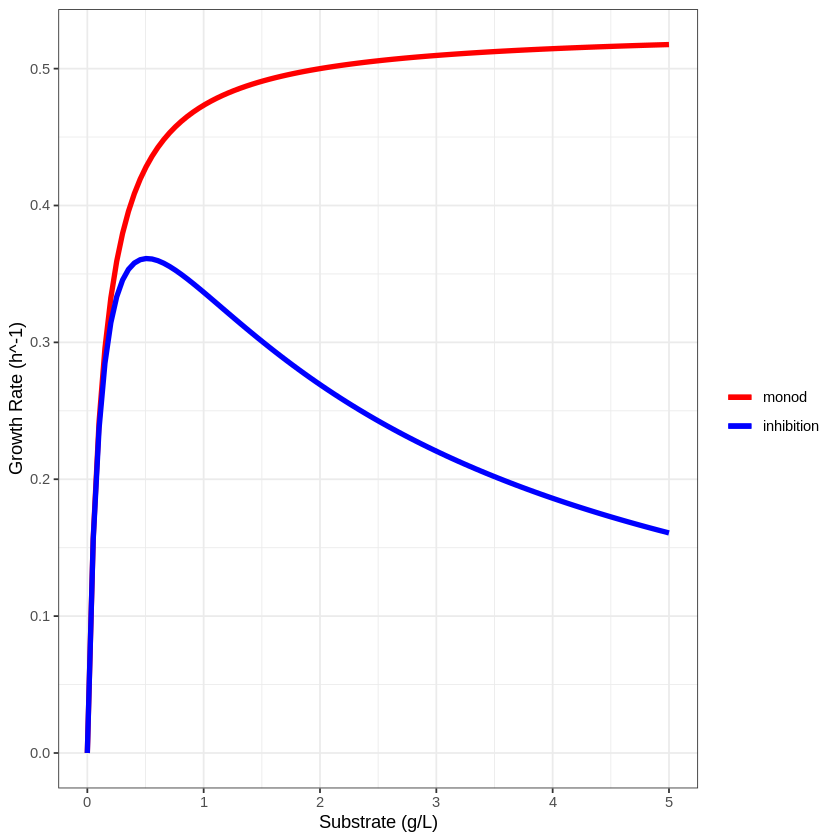

In [48]:
ggplot(data,aes(s)) +
  geom_line(aes(y=monod, color = "monod"), lwd = 1.5) +
  geom_line(aes(y=inhibition, color = "inhibition"), lwd = 1.5) +
  scale_color_manual("", breaks = c("monod", "inhibition"),
                          values = c("red","blue")) +
  xlab("Substrate (g/L)") +
  ylab("Growth Rate (h^-1)") +
  theme_bw()

Figura 2. Comparación de modelos de inhibición Monod y Substrate para la tasa de crecimiento.

| Monod | Inhibición por sustrato |
| :------- | :----: | 
| $\mu_{max}$ = 0.53 $h^{-1}$ | $\mu_{max}$ = 0.53 $h^{-1}$ |
| $k_s$ = 0.12 g/L | $k_s$ = 0.12 g/L | 
| Y = 0.4 | $k_I$ = 0.4545 L/g  |
| $s_f$ = 4.0 g/L | $s_f$ = 4.0 g/L |

Observe que la ecuación de Monod es un caso especial de (14), con $ k_I = 0 $

# Red para describir el proceso 

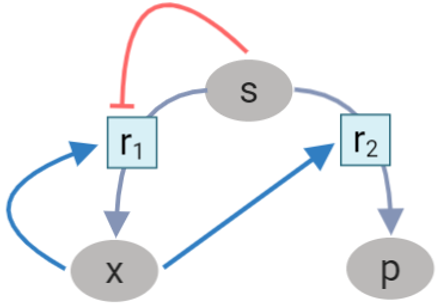

Figura 1. Red del proceso donde se observan las "reacciones" así como las especies que intervienen en estas reacciones y su efecto sobre las reacciones

En la Fig.1 se observa que para describir el presente proceso se consideran solamente dos reacciones, la reacción $r_1$ da lugar a la generación de biomasa a partir del sustrato, mientras que la reacción $r_2$ da lugar a la generación de producto a partir de sustrato. También se observa que la biomasa ($x$) tiene un efecto positivo sobre ambas reacciones mientras que el sustrato ($s$) tienen un efecto negativo sobre $r_1$.

# Análisis de estabilidad  modelo inhibición por sustrato 

Describir los puntos de equilibrio, explicar cómo los obtienen, y si esperan/observan bifurcaciones. Incluir código comentado o procedimiento algebraico. 

En las siguiente secciones se describen con detalle los puntos de equilibrio así como su dependencia con respecto a los parámetros del modelo. Sin embargo, aquí se muestran los dos puntos de equilibrio que se encontraron:

$$\frac{ds}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm} D(s_{f} - s) - r_{2} = 0  \hspace{1cm}  (1)$$
$$\frac{dx}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm}  r_{1} - Dx = 0 \hspace{1cm} (2)$$

Resolviendo la ecuación 1 y 2 para las variables $s$ y $x$, se obtienes los siguientes puntos de equilibrio:



$$P_{1}: \hspace{1cm} \bar{s} = s_{f}, \hspace{0.25cm} \bar{x} = 0$$ \

$$P_{2}: \hspace{1cm} \bar{s} = \frac{-(1- \frac{\mu_{max}}{D}) - \sqrt{(1-\frac{\mu_{max}}{D})^2 - 4 k_i k_s}}{2k_i}, \hspace{0.25cm} \bar{x} = \frac{D Y (s_f - \bar{s})}{\mu_{max}}$$ \

$$P_{3}: \hspace{1cm} \bar{s} = \frac{-(1- \frac{\mu_{max}}{D}) + \sqrt{(1-\frac{\mu_{max}}{D})^2 - 4 k_i k_s}}{2k_i}, \hspace{0.25cm} \bar{x} = \frac{D Y (s_f - \bar{s})}{\mu_{max}}$$

Puntos de equilibrio obtenidos con Python.

https://github.com/JuanM-GG/sistemas-dinamicos-Python/blob/main/steady_state_inhibition.ipynb

In [49]:
# cargar Grind.R
install.packages("rootSolve")
install.packages("FME")
source("Grind.R")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



grind.R was sourced


In [50]:
model <- function(times, state, parms) {
  with(as.list(c(state, parms)), {

    # velocidad de crecimiento 
    r1 = mu_max*s/(ks + s + ki*s^2)*x

    # balances de especies
    ds = -(1/Y)*r1 + D*(sf - s)
    dx = r1 - D*x

    return(list(c(ds,dx))) 
  })
}

In [51]:
# establecer parámetros 
p <- c(mu_max = 1.2, ks = 180, ki = 10, Y = 0.2, sf = 40, D = 0.009)

In [52]:
# condiciones iniciales
s <- c(s = 10, x = 0.1)

In [53]:
# función para calcular los puntos de equilibrio
steady_state <- function(p) {
        with(as.list(p), {
                
                # Primer punto de equilibrio
                s1 = sf
                x1 = 0
                ss1 = c(s = s1, x = x1)
                
                # segundo punto de equilibrio
                s2 = (-(1-mu_max/D) - sqrt((1-mu_max/D)^2 - 4*ki*ks))/(2*ki)
                x2 = Y*(sf - s2)
                ss2 = c(s = s2, x = x2)
                
                # segundo punto de equilibrio
                s3 = (-(1-mu_max/D) + sqrt((1-mu_max/D)^2 - 4*ki*ks))/(2*ki)
                x3 = Y*(sf - s3)
                ss3 = c(s = s3, x = x3)
                
                
                return(list(ss1 = round(ss1, 3),ss2 = round(ss2, 3), ss3 = round(ss3, 3)))
        })
}

¿Cuáles son los puntos de equilibrio para el valor de los parámetros que hemos establecido?

In [54]:
steady_state(p)

$ss1
 s  x 
40  0 

$ss2
    s     x 
1.539 7.692 

$ss3
     s      x 
11.694  5.661

Para ver los puntos de equilibrio en un plano de fase, junto con las ceroclinas, usamos la función `plane()` y la función `newton()`

       s        x 
1.539238 7.692152 
Stable point, eigenvalues:  -0.1712733 -0.009 


s        x 
1.539238 7.692152

        s         x 
11.693906  5.661219 
Unstable point, eigenvalues:  0.01659214 -0.009 


s         x 
11.693906  5.661219

 s  x 
40  0 
Stable point, eigenvalues:  -0.009 -0.006040691 


s  x 
40  0

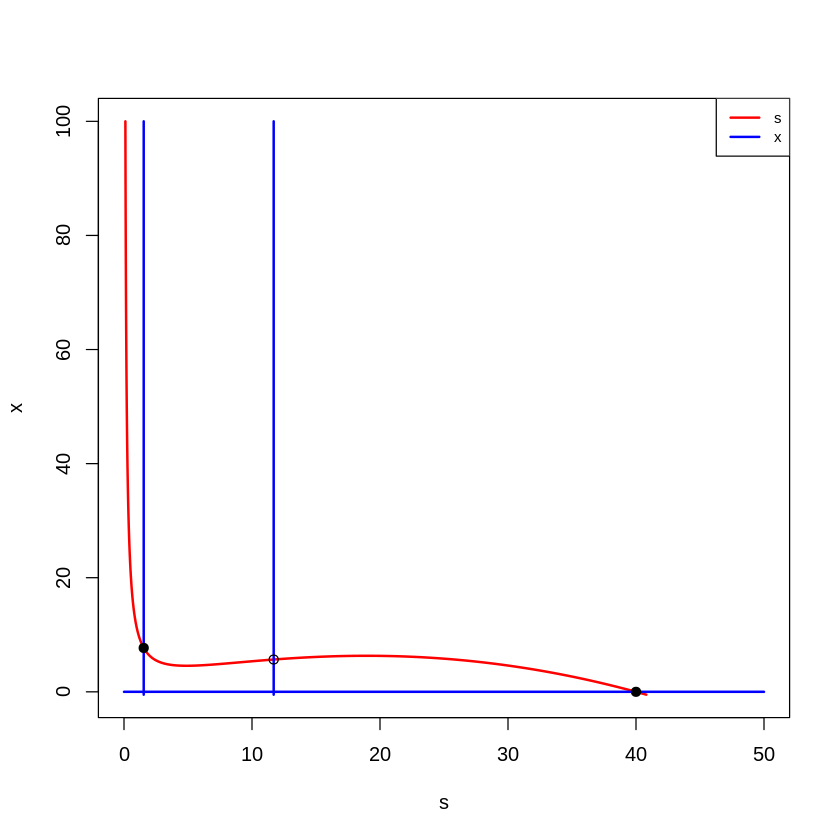

In [55]:
plane(xmin = 0, xmax = 50, ymin = -0.5, ymax = 100)
newton(state = c(s = 2, x = 10), plot = T)
newton(state = c(s = 12, x = 5), plot = T)
newton(state = c(s = 40, x = 0), plot = T)

De acuerdo con la la salida anterior, el punto de equilibrio *ss1* $(s = 40, x = 0)$ y el punto de equilibrio *ss2* $(s = 1.539, x = 7.692)$ son estables, mientras que el punto de equilibrio *ss3* $(s = 11.694, x = 5.661)$ es inestable.  

### Efecto del parámetro D sobre el punto de equilibrio

       s        x 
1.360201 7.727960 
Stable point, eigenvalues:  -0.2537492 -0.009 
       s        x 
1.360202 7.727960 
Stable point, eigenvalues:  -0.2537492 -0.009 
 s  x 
40  0 
Unstable point, eigenvalues:  0.2091818 -0.009 


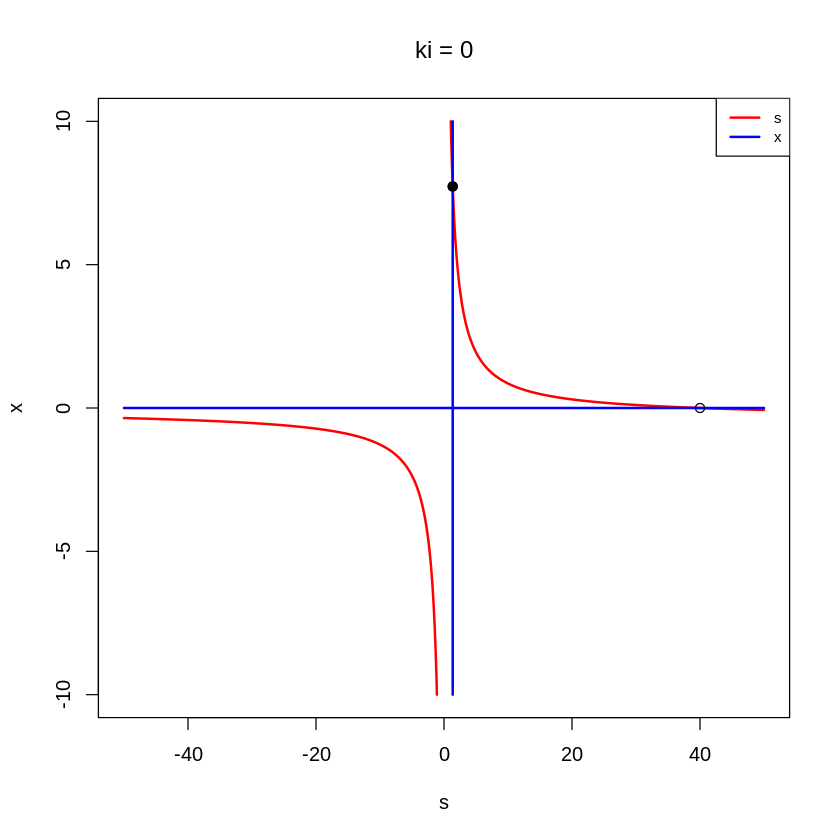

       s        x 
1.360341 7.727932 
Stable point, eigenvalues:  -0.25367 -0.009 
       s        x 
1.360341 7.727932 
Stable point, eigenvalues:  -0.25367 -0.009 
 s  x 
40  0 
Unstable point, eigenvalues:  0.1943898 -0.009 


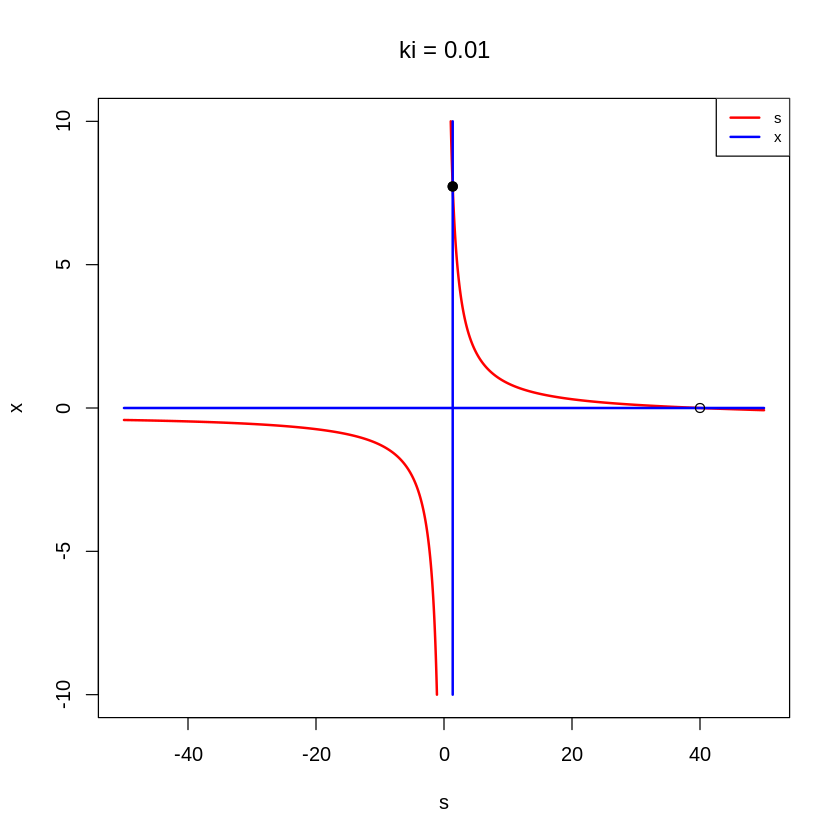

       s        x 
1.404949 7.719010 
Stable point, eigenvalues:  -0.2297517 -0.009 
 s  x 
40  0 
Unstable point, eigenvalues:  -0.009 0.000561753 
         s          x 
42.7070120 -0.5414024 
Stable point, eigenvalues:  -0.009 -0.0005302838 


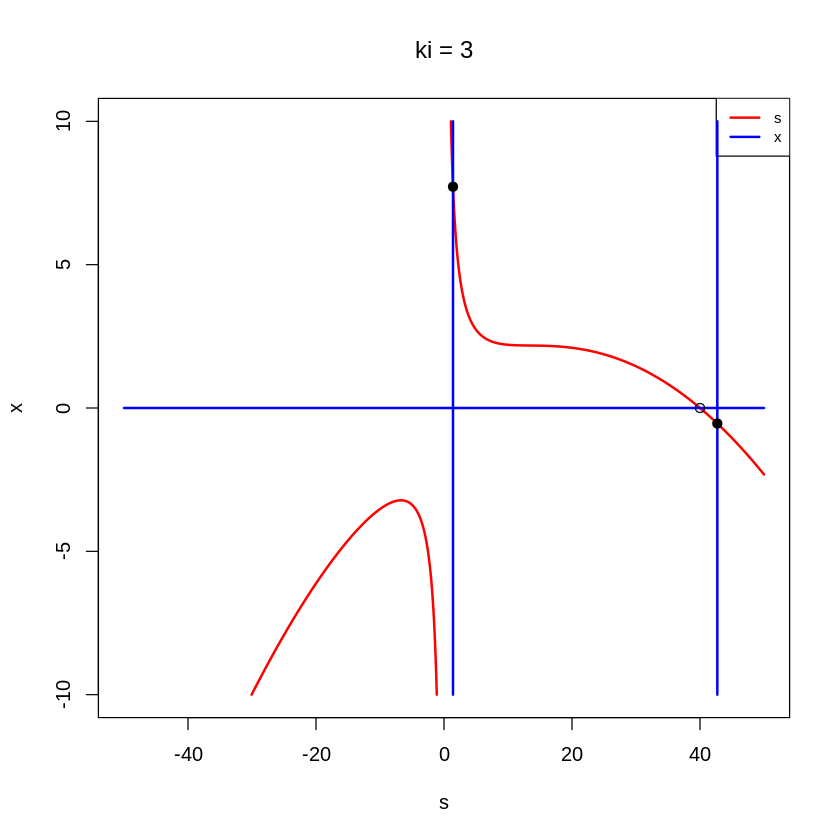

       s        x 
1.438372 7.712326 
Stable point, eigenvalues:  -0.2134442 -0.009 
        s         x 
25.027737  2.994453 
Unstable point, eigenvalues:  -0.009 0.004763088 
           s            x 
 4.00000e+01 -2.49844e-07 
Stable point, eigenvalues:  -0.009 -0.003160584 


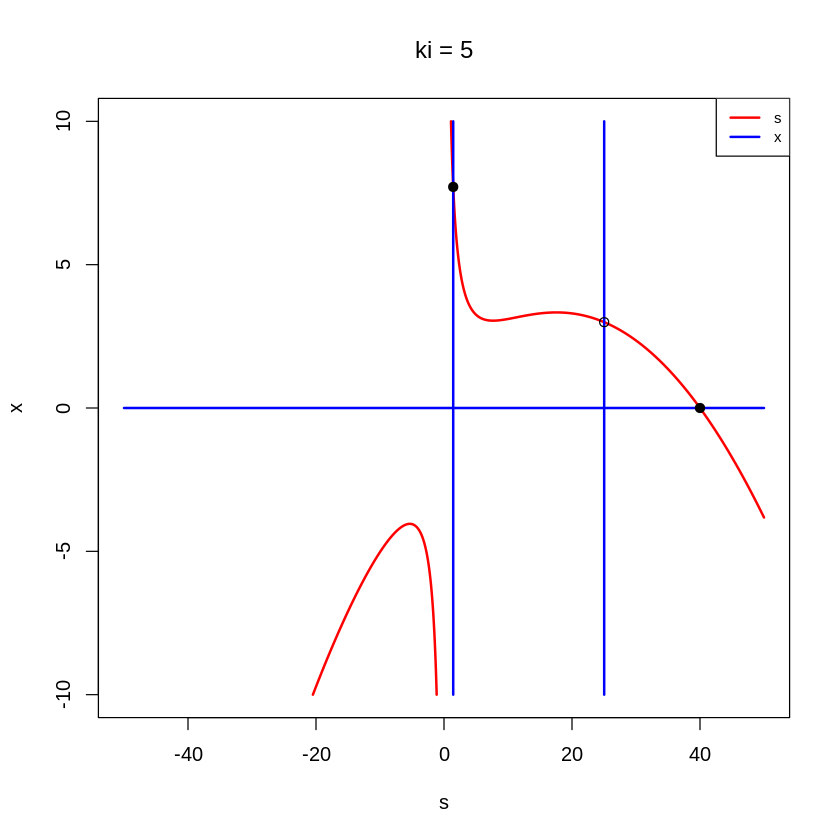

       s        x 
1.539238 7.692152 
Stable point, eigenvalues:  -0.1712733 -0.009 
        s         x 
11.694077  5.661185 
Unstable point, eigenvalues:  0.01659164 -0.009 
            s             x 
 4.000001e+01 -1.402445e-06 
Stable point, eigenvalues:  -0.009 -0.006040692 


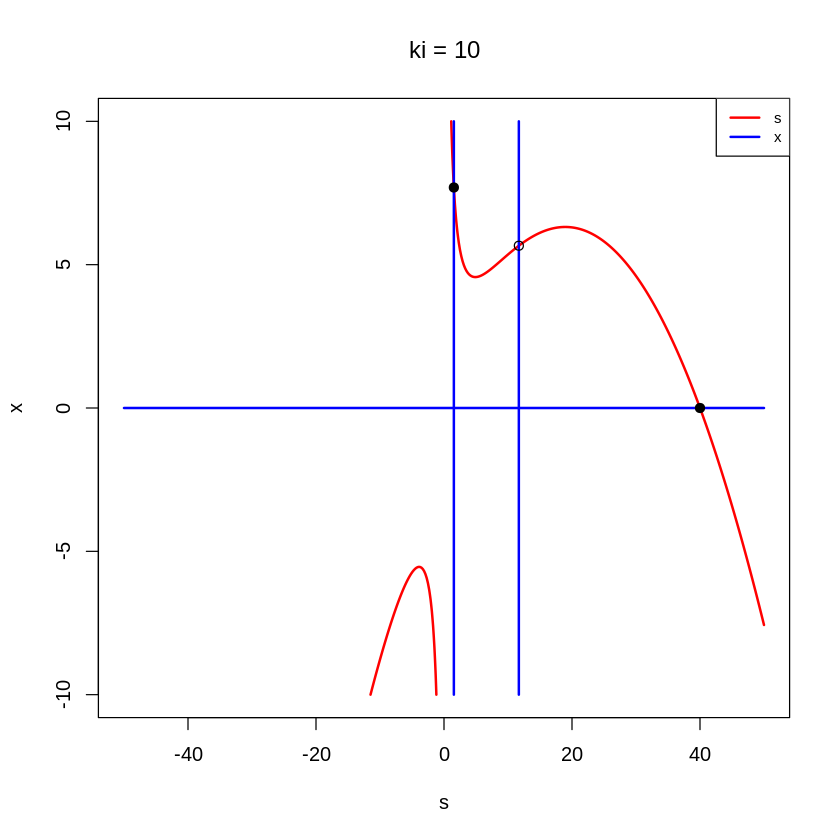

       s        x 
1.680183 7.663963 
Stable point, eigenvalues:  -0.1261251 -0.009 
       s        x 
7.141762 6.571648 
Unstable point, eigenvalues:  0.02544307 -0.009 
            s             x 
 4.000000e+01 -5.040774e-08 
Stable point, eigenvalues:  -0.009 -0.007018167 


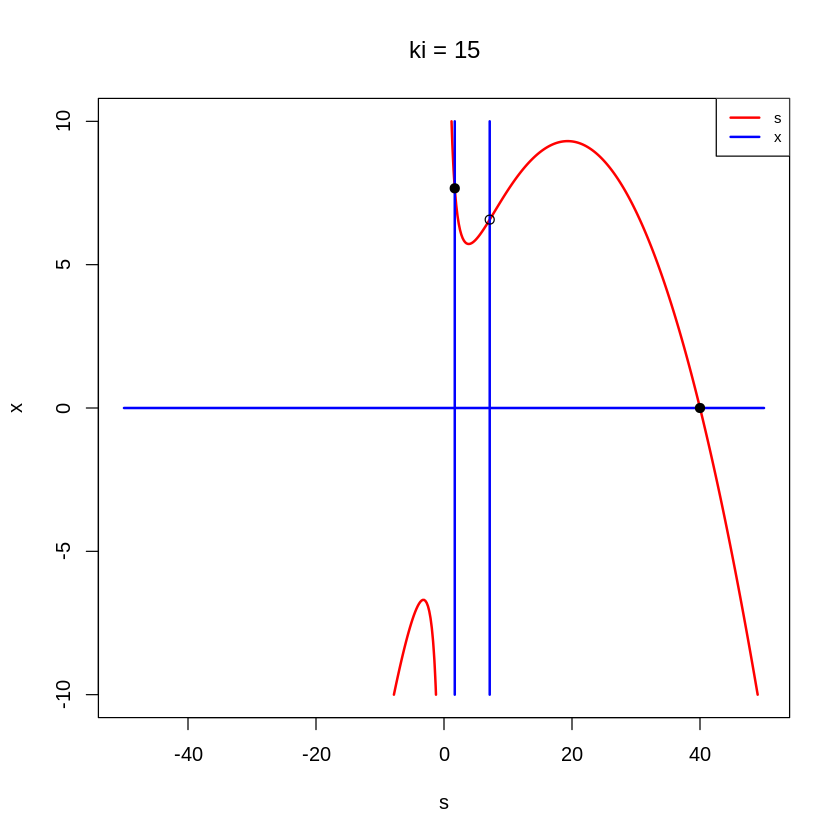

In [56]:
for (ki in c(0.0,0.01,3,5,10,15)) {

  p["ki"] <- ki
  plane(xmin = -50, xmax = 50, ymin = -10, ymax = 10, main = paste0("ki = ", ki))
  newton(state = c(s = 0, x = 10), plot = TRUE)
  newton(state = c(s = 8, x = 3), plot = TRUE)
  newton(state = c(s = 50, x = -5), plot = TRUE)
}
p["ki"] <- 0 # Regresar ki a su valor original


En la salida anterior vemos que cuando $k_i = 0$ el plano de fase es el mismo que en el caso del modelo de Monod , los puntos de equilibrio que se obtienen $(s_{ss} = 10, x_{ss} = 0)$ y $(s_{ss} = 1.513, x_{ss} = 0.849)$ corresponden a los puntos críticos $(s_{ss} = s_f, x_{ss} = 0)$ y $(s_{ss} = kD/(\mu - D), x_{ss} = Y_{xs}(s_f - s_{ss}))$ respectivamente. 

Para valores de $k_i > 0$ existen tres puntos de equilibrio, cuaya estabilidad se analiza más adelante.

### Diagrama de bifurcación 

       s        x 
1.404949 7.719010 
Stable point, eigenvalues:  -0.2297517 -0.009 
 s  x 
40  0 
Unstable point, eigenvalues:  -0.009 0.000561753 
Starting at ki = 3 with:
       s        x 
1.404949 7.719010 
Starting at ki = 3 with:
 s  x 
40  0 
Bifurcation at ki = 3.2 
Bifurcation at ki = -0.2 
        s         x 
25.028293  2.994341 
Unstable point, eigenvalues:  -0.009 0.00476256 
Starting at ki = 5 with:
        s         x 
25.028293  2.994341 
Bifurcation at ki = -0.2 


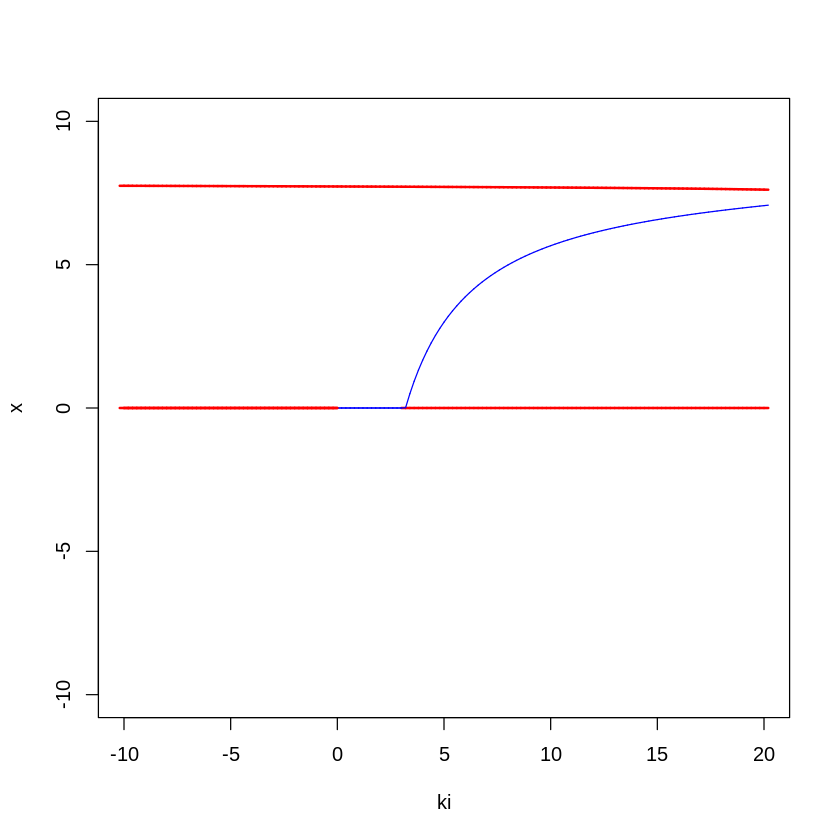

In [59]:
p["ki"] <- 3
ss1 <- newton(state = c(s = 0, x = 10))
ss2 <- newton(state = c(s = 8, x = 3))


continue(state = ss1, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "x", ymin = -10, ymax = 10)

continue(state = ss2, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "x", ymin = -10, ymax = 10, add = TRUE)

p["ki"] <- 5
ss3 <- newton(state = c(s = 20, x = 4))
continue(state = ss3, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "x", ymin = -10, ymax = 10, add = TRUE)
p["ki"] <- 0 # Regresar ki a su valor original

       s        x 
1.404949 7.719010 
Stable point, eigenvalues:  -0.2297517 -0.009 
 s  x 
40  0 
Unstable point, eigenvalues:  -0.009 0.000561753 
Starting at ki = 3 with:
       s        x 
1.404949 7.719010 
Starting at ki = 3 with:
 s  x 
40  0 
Bifurcation at ki = 3.2 
Bifurcation at ki = -0.2 
        s         x 
25.028293  2.994341 
Unstable point, eigenvalues:  -0.009 0.00476256 
Starting at ki = 5 with:
        s         x 
25.028293  2.994341 
Bifurcation at ki = -0.2 


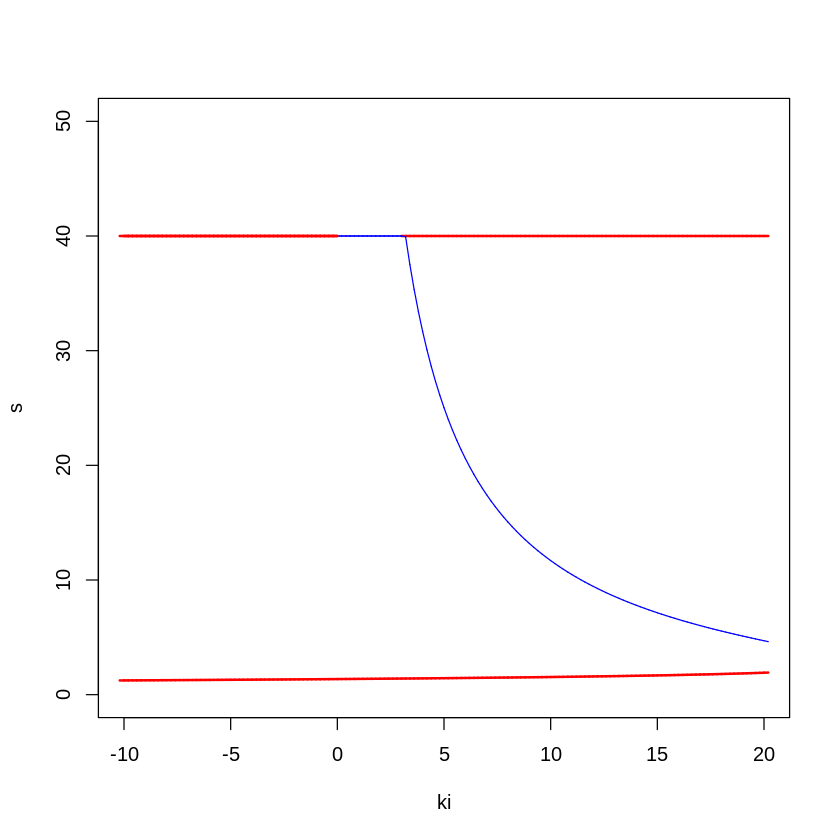

In [60]:
p["ki"] <- 3
ss1 <- newton(state = c(s = 0, x = 10))
ss2 <- newton(state = c(s = 8, x = 3))


continue(state = ss1, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "s", ymin = 0, ymax = 50)

continue(state = ss2, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "s", ymin = 0, ymax = 50, add = TRUE)

p["ki"] <- 5
ss3 <- newton(state = c(s = 20, x = 4))
continue(state = ss3, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "s", ymin = 0, ymax = 50, add = TRUE)
p["ki"] <- 0 # Regresar ki a su valor original

# Restricciones en el punto de equilibrio 

Si graficamos la tasa de crecimiento y la tasa de dilución como funciones de $s$ vemos que se requiere satisfacer la siguiente desigualdad

$$D < \frac{\mu_{max}}{1 + 2 \sqrt {k_i k_m}}$$


In [61]:
# función para graficar tasas de crecimiento y dilución 
rates <- function(p) {
  with(as.list(p), {

    s <- seq(0,250,len=1000)
    # tasa de crecimiento 
    mu = mu_max*s/(ks + s + ki*s^2)

    # tasa de dilución 
    D = rep(D, length(s))

    data = data.frame(s=s,mu=mu,D=D)

    return(data)

  })
}

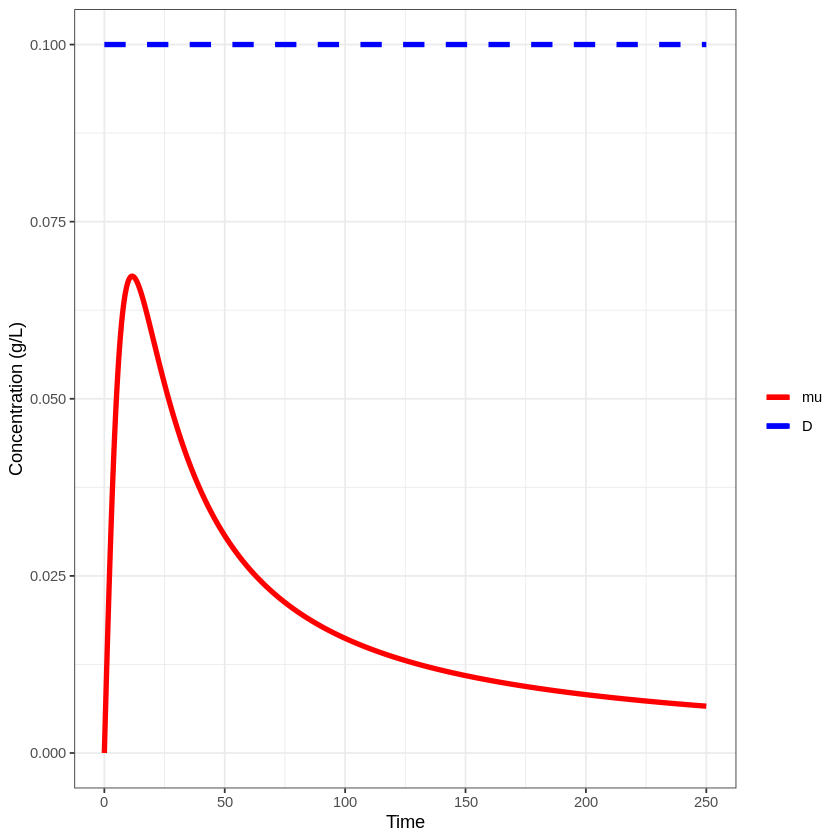

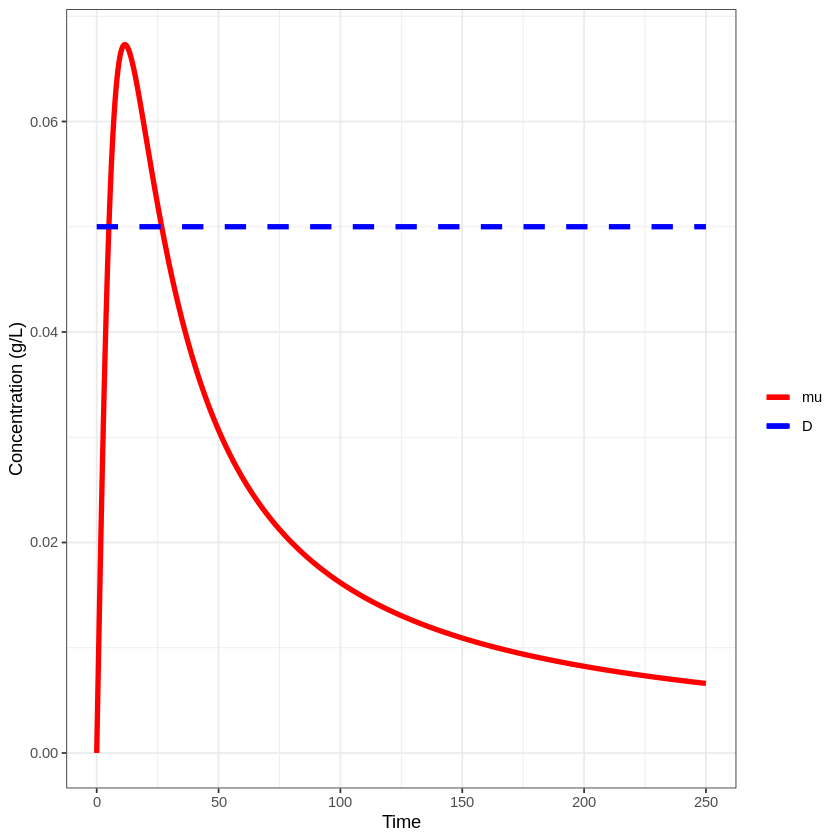

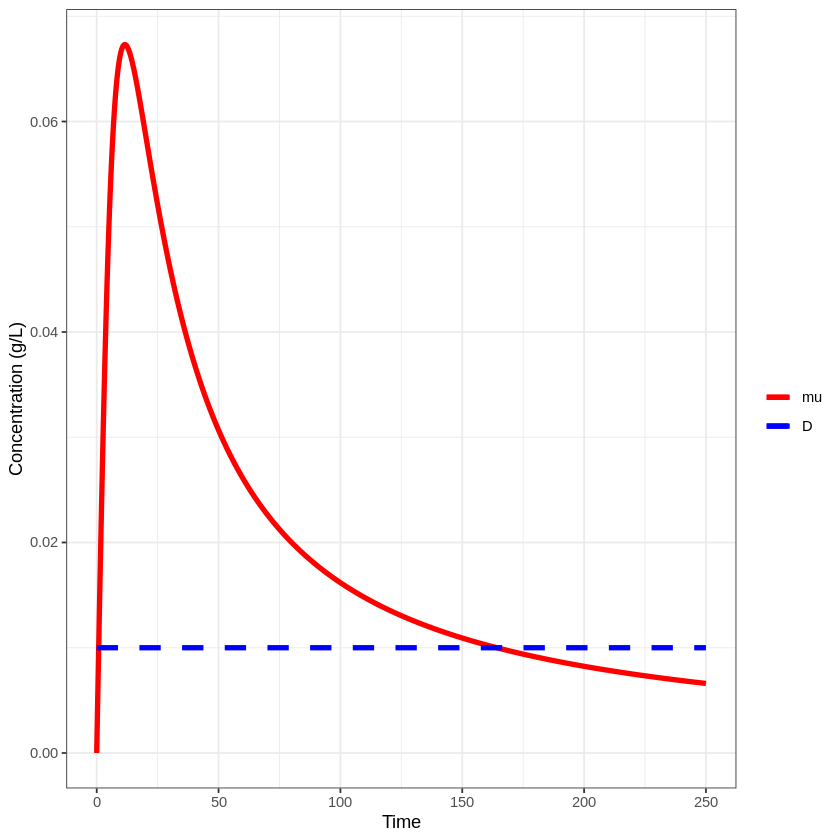

In [62]:
for (D in c(0.1,0.05,0.01)) {
  p <- c(mu_max = 1, ks = 80, Y = 0.1, D = D, sf = 10, ki = 0.6)
  data <- rates(p)
  # graficar tasas 
  print(
    ggplot(data,aes(s)) +
    geom_line(aes(y = mu, color = "mu"), lwd = 1.5) +
    geom_line(aes(y = D, color = "D"), lwd = 1.5, lty = 2) + 
    scale_color_manual("", breaks = c("mu","D"), values = c("red", "blue")) +
    xlab("Time") +
    ylab("Concentration (g/L)") +
    theme(title = paste0("D = ", D)) +
    theme_bw()
  )
}

Para que exista un equilibrion en la concentración de biomasa, es decir, $dx/dt = 0$, es necesarion que la tasa de crecimiento iguale a la tasa de dilución, pero como se puede observar en la salida anterior, si la tasa de dilución es demasiado grande, no importa cuando aumente $s$, las tasas no serán iguales. 

Para determinar cuál es est valor de la tasa de dilución $D$ que no se debe sobrepasar para que exista un equilibrio, podemos obtener el máximo de la función que representa la tasa de crecimiento

$$\mu(s) = \frac{\mu_{max}s}{k_s + s + k_is^2}$$

$$\frac{\partial \mu(s)}{\partial s} = \mu \left( \frac{k_s - k_i s^2}{(k_s + s + k_i s^2)^2} \right) $$

$$\frac{\partial \mu(s)}{\partial s} = 0 \hspace{1cm} \rightarrow \hspace{1cm} s_{max} = \sqrt \frac{k_s}{k_i}$$

Evaluando $\mu(s)$ en este valor de $s$ encontramos que el máximo de la función es

$$\mu(s_{max}) = \frac{\mu_{max}}{1 + 2\sqrt {k_s k_i}}$$

Por lo tanto 

$$D < \frac{\mu_{max}}{1 + 2\sqrt {k_s k_i}}$$

### Linealización

El siguiente analisis se puede obtener usando la función `newton()`, sin embargo, se considera importante observar la manera en la que se calcula la estabilidad de los puntos de equilibrio a partir de la linealización del sistema de EDO.

Las derivadas parciales en la matriz Jacobiana se pueden obtener mediante la librería `numpy` de Python. https://github.com/JuanM-GG/sistemas-dinamicos-Python/blob/main/puntos_de_equilibrio_monod.ipynb

In [63]:
# función que calcula la matriz Jacobiana en el punto de equilibrio 
my_jacobi <- function(ss,p) {
  with(as.list(c(ss,p)), { 

    dfdx = mu_max*s/(ki*s**2 + ks + s) - D
    dfds = mu_max*x*(ks - ki*s**2)/(ks + s + ki*s**2)**2
    dgdx = - mu_max*s/(Y*(ki*s**2 + ks + s))
    dgds = -D - (1/Y)*mu_max*x*(ks - ki*s**2)/(ks + s + ki*s**2)**2

    A = matrix(c(dfdx,dfds,dgdx,dgds), nrow = 2, byrow = T)

    trace = dfdx + dgds

    det = dfdx*dgds - dgdx*dfds

    lamda1 = (trace - (trace**2 - 4*det)^{1/2})/2
    lamda2 = (trace + (trace**2 - 4*det)^{1/2})/2

    out = list(A = A, eigenvals = c(lamda1 = round(lamda1, 3), lamda2 = round(lamda2, 3)))

    return(out)

  })
}

In [64]:
# establecer parámetros  
p <- c(mu_max = 1.2, ks = 180, ki = 10, Y = 0.2, sf = 40, D = 0.009)

In [66]:
# obtener puntos de equilibrio 
ss1 <- steady_state(p)$ss1
ss2 <- steady_state(p)$ss2
cat("ss1: ",ss1,"\n")
cat("ss2: ", ss2)

ss1:  40 0 
ss2:  1.539 7.692

In [68]:
# evaluar matriz Jacobiana en punto de equilibrio (s* = sf, x* = 0)
J1 <- my_jacobi(ss1, p)
print(J1)

$A
             [,1]   [,2]
[1,] -0.006040691  0.000
[2,] -0.014796547 -0.009

$eigenvals
lamda1 lamda2 
-0.009 -0.006 



In [69]:
# evaluar matriz Jacobiana en punto de equilibrio (s* = k*D/(mu-D), x* = y*(sf-s*))
J2 <- my_jacobi(ss2, p)
print(J2)

$A
              [,1]        [,2]
[1,] -1.061717e-06  0.03425811
[2,] -4.499469e-02 -0.18029055

$eigenvals
lamda1 lamda2 
-0.171 -0.009 



El resultado es el mismo que el obtenido con la fución `newton()`